In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

import scorecardpy as sc
import pickle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# # load saved model
with open('lgbm_pkl_1' , 'rb') as f:
     lgbm = pickle.load(f)

# Getting Model Features
score_feat_lgbm = lgbm.feature_name_

# # load saved model
# with open('rf_pkl_1' , 'rb') as f:
#     rf = pickle.load(f)

# # Getting Model Features
# score_feat = rf.feature_name_    

# # # load saved model
# with open('xgb_pkl_1' , 'rb') as f:
#      xgb = pickle.load(f)

# # Getting Model Features
# score_feat_xgb = xgb.get_booster().feature_names


# #New Experiment

# with open('xgb_pkl_2' , 'rb') as f:
#      xgb = pickle.load(f)

# # Getting Model Features
# score_feat_xgb = xgb.get_booster().feature_names

In [34]:
print('Pandas==',pd.__version__)
#print('streamlit':.__version__)
print('scorecardpy==',sc.__version__)

Pandas== 1.3.4
scorecardpy== 0.1.9.2


In [2]:
#Read the validation sample
health_validation=pd.read_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\health_validation.csv')
val=health_validation

#Keeping the raw features
raw_features=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\RAW_Features.csv")
raw_feat=list(raw_features['Raw Features'])
val_score=val[raw_feat]

# Read the dev_woe_validation dataframe
dev_woe_validation=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\dev_woe_validation.csv")

#
#ClmDiag_7_out_woe=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\ClmDiagnosisCode_7_out_nunique_woe.csv")

In [22]:
# 
test=val_score[val_score['Provider']=='PRV51064']

In [23]:
test

,Provider,InscClaimAmtReimbursed_merged_sum,ClmDiagnosisCode_8_in_count,InscClaimAmtReimbursed_in_sum,Race_3_merged_sum,InscClaimAmtReimbursed_out_std,Race_2_merged_sum,InscClaimAmtReimbursed_merged_max,OtherPhysician_out_nunique,ChronicCond_Cancer_merged_sum,Race_5_merged_sum,ClmDiagnosisCode_7_in_nunique,InscClaimAmtReimbursed_in_min,ChronicCond_stroke_merged_sum,InscClaimAmtReimbursed_in_max,Age_merged_max,AttendingPhysician_out_nunique,ClmDiagnosisCode_5_in_count,Age_merged_min,Claim_duration_merged_mean,InscClaimAmtReimbursed_out_mean,ChronicCond_rheumatoidarthritis_merged_sum,OperatingPhysician_out_nunique,InscClaimAmtReimbursed_merged_std,OtherPhysician_in_nunique,ChronicCond_KidneyDisease_merged_sum,InscClaimAmtReimbursed_out_max,Age_merged_mean,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_7_out_nunique,ChronicCond_ObstrPulmonary_merged_sum,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,OperatingPhysician_in_nunique,ChronicCond_Alzheimer_merged_sum,PotentialFraud,derived_ClmDiagnosisCode_9_flag,derived_Race_3_flag
2,PRV51064,360320,26.0,280000.0,0.0,539.722216,65.0,37000,61.0,39,1.0,28.0,0.0,41,37000.0,100.0,97.0,33.0,29.0,2.950495,300.82397,92,32.0,3480.867524,6.0,139,3300.0,73.415842,34.0,8.0,22.0,107,21.0,21.0,17.0,110,1,0,0


In [25]:
test_feat=scoring(test, dev_woe_validation)

[INFO] converting into woe values ...


In [26]:
test_feat

,Provider,InscClaimAmtReimbursed_merged_max_woe,Age_merged_min_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,ClmDiagnosisCode_9_out_count_woe,InscClaimAmtReimbursed_merged_std_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_out_mean_woe,ClmDiagnosisCode_8_in_count_woe,InscClaimAmtReimbursed_in_min_woe,ChronicCond_KidneyDisease_merged_sum_woe,InscClaimAmtReimbursed_in_sum_woe,InscClaimAmtReimbursed_out_std_woe,Race_2_merged_sum_woe,Race_3_merged_sum_woe,OtherPhysician_out_nunique_woe,ChronicCond_stroke_merged_sum_woe,Age_merged_max_woe,ChronicCond_Cancer_merged_sum_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,OperatingPhysician_out_nunique_woe,Age_merged_mean_woe,OperatingPhysician_in_nunique_woe,ClmDiagnosisCode_5_in_count_woe,ClmDiagnosisCode_7_in_nunique_woe,OtherPhysician_in_nunique_woe,InscClaimAmtReimbursed_in_max_woe,ClmDiagnosisCode_6_out_count_woe,AttendingPhysician_out_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_7_out_nunique_woe,Claim_duration_merged_mean_woe,Race_5_merged_sum_woe,derived_ClmDiagnosisCode_9_flag,derived_Race_3_flag,PotentialFraud
0,PRV51064,1.494571,1.0242,1.871733,1.416544,0.043085,3.0368,0.514969,2.684431,-0.206406,1.999133,2.220651,0.164371,1.554152,-0.985193,1.42944,1.911093,0.246057,1.851632,1.74426,1.316732,0.362694,1.514409,2.636906,2.621535,1.82308,1.057651,1.593642,1.301469,1.816995,0.360248,1.711717,-0.085252,0.119946,0,0,1


In [27]:
test_feat.shape

(1, 37)

In [28]:
score_data_1=test_feat

In [29]:
 y_val_pred = xgb.predict(score_data_1[score_feat_xgb])
# y_val_pred_prob = xgb.predict_proba(score_data_1[score_feat_xgb])[:,1]

In [30]:
# print('score:',y_val_pred_prob)
print('Prediction: ',y_val_pred)

Prediction:  [1]


In [11]:
dev_woe_validation.shape

(148, 12)

In [12]:
val_score.head()

,Provider,InscClaimAmtReimbursed_merged_sum,ClmDiagnosisCode_8_in_count,InscClaimAmtReimbursed_in_sum,Race_3_merged_sum,InscClaimAmtReimbursed_out_std,Race_2_merged_sum,InscClaimAmtReimbursed_merged_max,OtherPhysician_out_nunique,ChronicCond_Cancer_merged_sum,Race_5_merged_sum,ClmDiagnosisCode_7_in_nunique,InscClaimAmtReimbursed_in_min,ChronicCond_stroke_merged_sum,InscClaimAmtReimbursed_in_max,Age_merged_max,AttendingPhysician_out_nunique,ClmDiagnosisCode_5_in_count,Age_merged_min,Claim_duration_merged_mean,InscClaimAmtReimbursed_out_mean,ChronicCond_rheumatoidarthritis_merged_sum,OperatingPhysician_out_nunique,InscClaimAmtReimbursed_merged_std,OtherPhysician_in_nunique,ChronicCond_KidneyDisease_merged_sum,InscClaimAmtReimbursed_out_max,Age_merged_mean,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_7_out_nunique,ChronicCond_ObstrPulmonary_merged_sum,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,OperatingPhysician_in_nunique,ChronicCond_Alzheimer_merged_sum,PotentialFraud
0,PRV51041,7410,0.0,0.0,0.0,562.423217,8.0,3200,5.0,10,0.0,0.0,0.0,2,0.0,91.0,9.0,0.0,38.0,3.352941,217.941176,9,4.0,562.423217,0.0,7,3200.0,70.823529,4.0,0.0,2.0,10,0.0,0.0,0.0,16,0
1,PRV51042,48050,0.0,0.0,0.0,625.791569,6.0,3300,27.0,20,1.0,0.0,0.0,13,0.0,100.0,52.0,0.0,27.0,2.232394,338.380282,38,27.0,625.791569,0.0,58,3300.0,73.147887,9.0,3.0,7.0,41,0.0,0.0,0.0,50,0
2,PRV51064,360320,26.0,280000.0,0.0,539.722216,65.0,37000,61.0,39,1.0,28.0,0.0,41,37000.0,100.0,97.0,33.0,29.0,2.950495,300.823970,92,32.0,3480.867524,6.0,139,3300.0,73.415842,34.0,8.0,22.0,107,21.0,21.0,17.0,110,1
3,PRV51098,300,0.0,0.0,0.0,85.049005,0.0,200,2.0,1,0.0,0.0,0.0,1,0.0,90.0,2.0,0.0,69.0,1.000000,75.000000,3,0.0,85.049005,0.0,2,200.0,82.500000,1.0,0.0,1.0,2,0.0,0.0,0.0,0,0
4,PRV51139,52580,6.0,41300.0,3.0,611.391855,4.0,14000,10.0,7,1.0,7.0,3000.0,3,14000.0,96.0,28.0,7.0,35.0,3.465116,313.333333,8,7.0,2617.764700,1.0,16,2600.0,74.767442,2.0,2.0,2.0,12,5.0,5.0,1.0,15,0


In [13]:
dev_woe_validation

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,InscClaimAmtReimbursed_out_max,"[-inf,2200.0)",2397,0.479017,2278,119,0.049645,-0.680597,0.168741,0.444820,2200.0,False
1,InscClaimAmtReimbursed_out_max,"[2200.0,3200.0)",768,0.153477,712,56,0.072917,-0.271394,0.010125,0.444820,3200.0,False
2,InscClaimAmtReimbursed_out_max,"[3200.0,3800.0)",1490,0.297762,1298,192,0.128859,0.360248,0.044707,0.444820,3800.0,False
3,InscClaimAmtReimbursed_out_max,"[3800.0,inf)",349,0.069744,248,101,0.289398,1.373024,0.221247,0.444820,inf,False
4,ClmDiagnosisCode_5_in_count,"[-inf,3.0)",3450,0.689448,3385,65,0.018841,-1.681389,1.021214,2.461491,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Race_3_merged_sum,"[8.0,inf)",504,0.100719,332,172,0.341270,1.613692,0.474957,0.867086,inf,False
144,InscClaimAmtReimbursed_in_min,"[-inf,200.0)",3616,0.722622,3336,280,0.077434,-0.206406,0.028310,0.194483,200.0,False
145,InscClaimAmtReimbursed_in_min,"[200.0,2200.0)",374,0.074740,287,87,0.232620,1.077758,0.132161,0.194483,2200.0,False
146,InscClaimAmtReimbursed_in_min,"[2200.0,3200.0)",422,0.084333,362,60,0.142180,0.474033,0.022943,0.194483,3200.0,False


In [14]:
def scoring(val_score, dev_woe_validation):
    val_score['derived_ClmDiagnosisCode_9_flag'] = np.where(val_score['ClmDiagnosisCode_9_in_count']>val_score['ClmDiagnosisCode_9_in_nunique'], 1, 0)
    val_score['derived_Race_3_flag'] = np.where(val_score['Race_3_merged_sum']>=30, 1, 0)
    
    # now to apply woebins on validation sample
    val_score_woe = sc.woebin_ply(val_score, dev_woe_validation)
    
    woe_feat_val = [i for i in val_score_woe.columns if i.endswith('_woe') or i in (['Provider']) ]
    
    
    score_data=pd.merge(val_score_woe[woe_feat_val],val_score[['Provider','derived_ClmDiagnosisCode_9_flag','derived_Race_3_flag','PotentialFraud']]
                          , on='Provider', how='left')
    

    return(score_data)

In [15]:
score_data_1 = scoring(val_score, dev_woe_validation)

[INFO] converting into woe values ...


In [16]:
score_data_1.head()

,Provider,InscClaimAmtReimbursed_merged_max_woe,Age_merged_min_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,ClmDiagnosisCode_9_out_count_woe,InscClaimAmtReimbursed_merged_std_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_out_mean_woe,ClmDiagnosisCode_8_in_count_woe,InscClaimAmtReimbursed_in_min_woe,ChronicCond_KidneyDisease_merged_sum_woe,InscClaimAmtReimbursed_in_sum_woe,InscClaimAmtReimbursed_out_std_woe,Race_2_merged_sum_woe,Race_3_merged_sum_woe,OtherPhysician_out_nunique_woe,ChronicCond_stroke_merged_sum_woe,Age_merged_max_woe,ChronicCond_Cancer_merged_sum_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,OperatingPhysician_out_nunique_woe,Age_merged_mean_woe,OperatingPhysician_in_nunique_woe,ClmDiagnosisCode_5_in_count_woe,ClmDiagnosisCode_7_in_nunique_woe,OtherPhysician_in_nunique_woe,InscClaimAmtReimbursed_in_max_woe,ClmDiagnosisCode_6_out_count_woe,AttendingPhysician_out_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_7_out_nunique_woe,Claim_duration_merged_mean_woe,Race_5_merged_sum_woe,derived_ClmDiagnosisCode_9_flag,derived_Race_3_flag,PotentialFraud
0,PRV51041,-1.471500,0.143511,-0.704597,-0.682954,-1.055606,-3.665324,-0.309632,-1.630640,-0.206406,-1.634001,-1.678762,0.563833,0.304822,-0.985193,-0.116136,-1.037195,-0.649957,-0.261810,-0.798056,-0.382496,0.362694,-1.682472,-1.681389,-1.692548,-0.627943,-1.663163,-0.387143,0.304530,-0.846731,0.360248,-0.601604,0.406422,-0.654107,0,0,0
1,PRV51042,-1.471500,1.024200,0.145465,0.066408,-1.055606,-2.013239,0.514969,-1.630640,-0.206406,0.608696,-1.678762,0.563833,0.304822,-0.985193,1.429440,0.506889,0.246057,0.629105,0.418948,1.316732,0.362694,-1.682472,-1.681389,-1.692548,-0.627943,-1.663163,0.225207,1.301469,0.380582,0.360248,0.344440,-0.085252,0.119946,0,0,0
2,PRV51064,1.494571,1.024200,1.871733,1.416544,0.043085,3.036800,0.514969,2.684431,-0.206406,1.999133,2.220651,0.164371,1.554152,-0.985193,1.429440,1.911093,0.246057,1.851632,1.744260,1.316732,0.362694,1.514409,2.636906,2.621535,1.823080,1.057651,1.593642,1.301469,1.816995,0.360248,1.711717,-0.085252,0.119946,0,0,1
3,PRV51098,-3.487569,-1.841361,-1.971326,-0.682954,-3.266789,-3.665324,-1.823012,-1.630640,-0.206406,-1.634001,-1.678762,-0.662909,-1.422265,-0.985193,-1.395688,-1.872349,-0.649957,-1.913259,-1.933360,-0.885071,-1.806205,-1.682472,-1.681389,-1.692548,-0.627943,-1.663163,-0.705217,-1.323694,-3.517097,-0.680597,-0.601604,-2.396451,-0.654107,0,0,0
4,PRV51139,0.117609,0.143511,-0.704597,0.066408,0.043085,0.490155,0.514969,0.616512,0.474033,-0.616432,-0.218325,0.563833,-0.263246,0.491191,-0.116136,-1.037195,-0.649957,-0.261810,-0.798056,0.436531,0.362694,0.706212,0.667036,0.597900,0.787152,-0.196332,-0.387143,0.304530,-0.846731,-0.271394,-0.601604,0.406422,0.119946,0,0,0


# Model Scoring

### Light GBM

========================== Model Validation Report =========================
================================= Accuracy =================================
Validation Accuracy: 0.840
===================== Model Validation Performance Metrices ================
Validation Confusion Matrix: 
[[306  62]
 [  3  35]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       368
           1       0.36      0.92      0.52        38

    accuracy                           0.84       406
   macro avg       0.68      0.88      0.71       406
weighted avg       0.93      0.84      0.87       406

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.949
===================== Model Validation AUC Curve ===========================


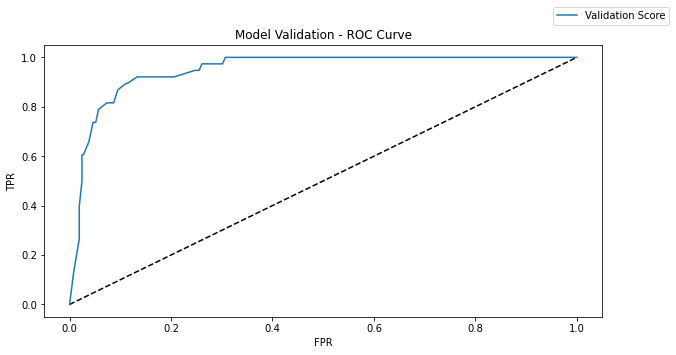

In [17]:
y_val_pred = lgbm.predict(score_data_1[score_feat_lgbm])
y_val_pred_prob = lgbm.predict_proba(score_data_1[score_feat_lgbm])[:,1]

val_accuracy = lgbm.score(score_data_1[score_feat_lgbm], score_data_1['PotentialFraud'])
auc_score = roc_auc_score(score_data_1['PotentialFraud'], y_val_pred_prob)


print("========================== Model Validation Report =========================")

print("================================= Accuracy =================================")
print("Validation Accuracy: %0.3f"%val_accuracy)
print("============================================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Validation Performance Metrices ================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data_1['PotentialFraud'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data_1['PotentialFraud'], y_val_pred))
print("============================================================================")


print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f"%auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data_1['PotentialFraud'], y_val_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Model Validation - ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()

###  XGBOOST

In [18]:
# # load saved model
with open('xgb_pkl_1' , 'rb') as f:
     xgb = pickle.load(f)

# Getting Model Features
score_feat_xgb = xgb.get_booster().feature_names


========================== Model Validation Report =========================
================================= Accuracy =================================
Validation Accuracy: 0.938
===================== Model Validation Performance Metrices ================
Validation Confusion Matrix: 
[[360   8]
 [ 17  21]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       368
           1       0.72      0.55      0.63        38

    accuracy                           0.94       406
   macro avg       0.84      0.77      0.80       406
weighted avg       0.93      0.94      0.93       406

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.953
===================== Model Validation AUC Curve ===========================


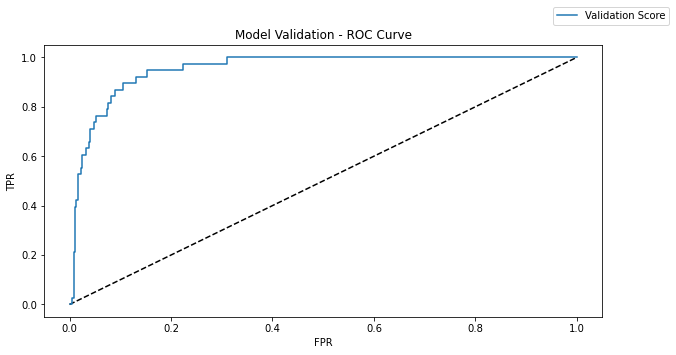

In [19]:
y_val_pred = xgb.predict(score_data_1[score_feat_xgb])
y_val_pred_prob = xgb.predict_proba(score_data_1[score_feat_xgb])[:,1]

val_accuracy = xgb.score(score_data_1[score_feat_xgb], score_data_1['PotentialFraud'])
auc_score = roc_auc_score(score_data_1['PotentialFraud'], y_val_pred_prob)


print("========================== Model Validation Report =========================")

print("================================= Accuracy =================================")
print("Validation Accuracy: %0.3f"%val_accuracy)
print("============================================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Validation Performance Metrices ================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data_1['PotentialFraud'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data_1['PotentialFraud'], y_val_pred))
print("============================================================================")


print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f"%auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data_1['PotentialFraud'], y_val_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Model Validation - ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()

## Random Forest

In [20]:
# # load saved model
with open('rf_pkl_1' , 'rb') as f:
     rf = pickle.load(f)

# Getting Model Features
score_feat_rf = rf.feature_names_in_


========================== Model Validation Report =========================
================================= Accuracy =================================
Validation Accuracy: 0.855
===================== Model Validation Performance Metrices ================
Validation Confusion Matrix: 
[[312  56]
 [  3  35]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       368
           1       0.38      0.92      0.54        38

    accuracy                           0.85       406
   macro avg       0.69      0.88      0.73       406
weighted avg       0.93      0.85      0.88       406

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.954
===================== Model Validation AUC Curve ===========================


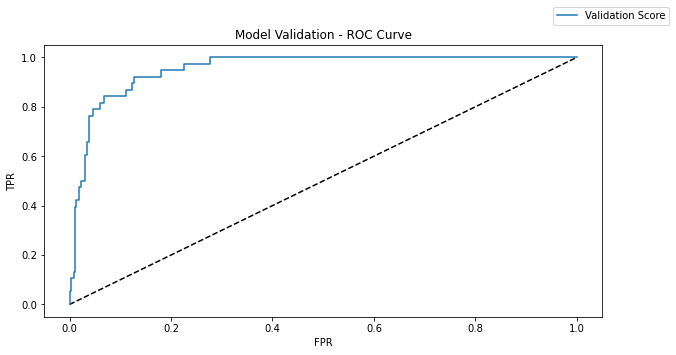

In [21]:
y_val_pred = rf.predict(score_data_1[score_feat_rf])
y_val_pred_prob = rf.predict_proba(score_data_1[score_feat_rf])[:,1]

val_accuracy = rf.score(score_data_1[score_feat_rf], score_data_1['PotentialFraud'])
auc_score = roc_auc_score(score_data_1['PotentialFraud'], y_val_pred_prob)


print("========================== Model Validation Report =========================")

print("================================= Accuracy =================================")
print("Validation Accuracy: %0.3f"%val_accuracy)
print("============================================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Validation Performance Metrices ================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data_1['PotentialFraud'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data_1['PotentialFraud'], y_val_pred))
print("============================================================================")


print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f"%auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data_1['PotentialFraud'], y_val_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Model Validation - ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()